# Analyze SoHappy output files
This scripts analyse the fits file produced with SoHappy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from astropy.table import Table, vstack
from IPython.display import display

import sys
sys.path.append("../../../../utilities_ths/")  
sys.path.append(".") 
from utilities_ths import MyLabel
from utilities_ths import stamp

import grb_stat

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

# Get the data
%run prepare_data.py

Data where read from file :  ../../output/Prod10_nobug/Pop_1-1000GRB_0dof_100iter.csv
Data counts :  2000


\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_3s  = g_ana[i3s]
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_5s  = g_ana[i5s]


# Computing time

\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.hist(niter*gpop[north].mct,bins=bins,
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  label=MyLabel(niter*gpop[north].mct,"North",stat="med"))
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.hist(niter*gpop[south].mct,bins=bins,
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  label=MyLabel(niter*gpop[south].mct,"South",stat="med"))
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-R

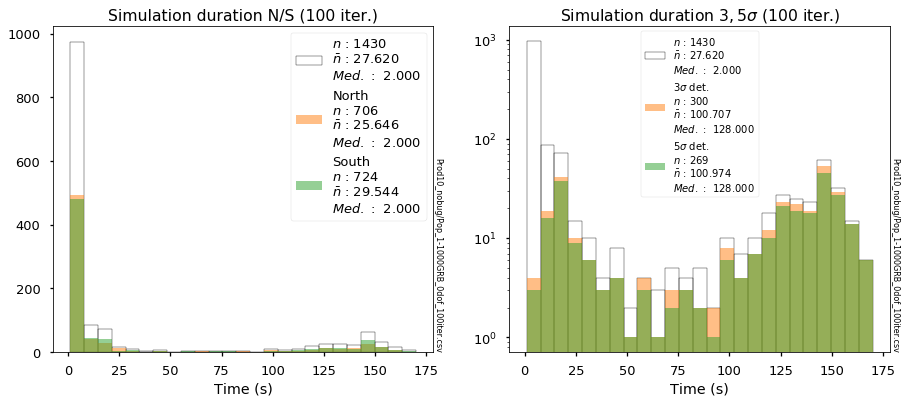

In [2]:
grb_stat.computing_time(file,g_vis,i3s,i5s,north,south,niter=100)

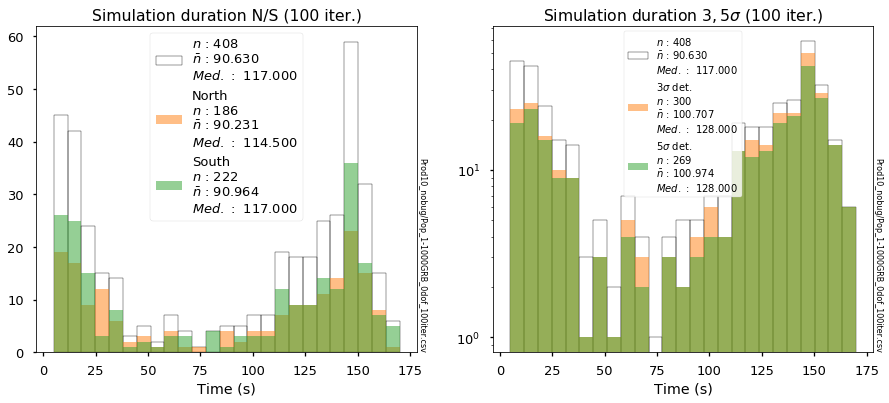

In [3]:
grb_stat.computing_time(file,g_ana,i3s,i5s,north,south,niter=100)

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


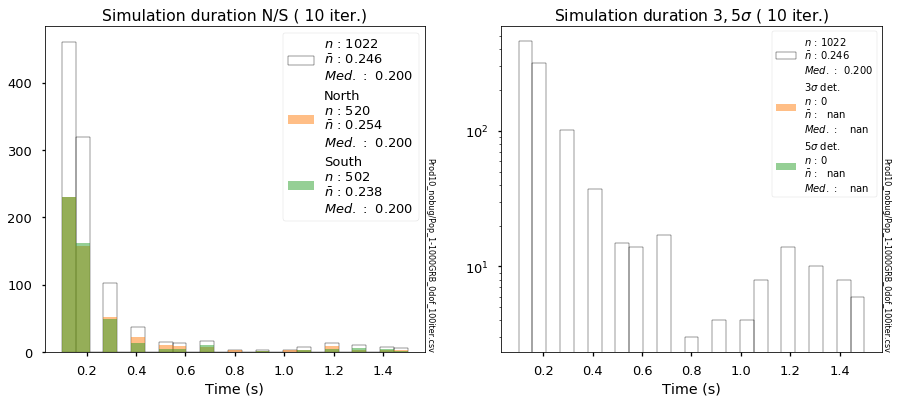

In [4]:
grb_stat.computing_time(file,g_abrt,i3s,i5s,north,south,niter=int(0.1*100))

In [5]:
cut=2.000000/100
print(len(g_vis[g_vis.mct<cut].mct))
print(len(g_vis[g_vis.mct>=cut].mct))

461
969


# Statistics

In [6]:
# Display stat
data = grb_stat.stat(grb, g_vis, g_ana,  g_abrt, g_3s, g_5s, i3s, i5s, north, south)

 This is a file with  2000  events, i.e.  1000.0  GRBs

           :  N or S     N     S
---------- : ------- ----- -----
Total      :    2000  1000  1000
Visible    :    1430   706   724
Aborted    :    1022   520   502
Full simul :     408   186   222
---------- : ------- ----- -----
3s 90%CL   :     300   141   159
5s 90%CL   :     269   128   141


\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Visible    : {:>7d} {:>5d} {:>5d}".format(len(g_vis),len(g_vis[north]),len(g_vis[south])))
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Aborted    : {:>7d} {:>5d} {:>5d}".format(len(g_abrt),len(g_abrt[north]),len(g_abrt[south])))
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Full simul : {:>7d} {:>5d} {:>5d}".format(len(g_ana),len(g_ana[north]),len(g_ana[south])))
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\grb_stat.py:38: UserWarning: Boolean Series key will 

In [7]:
# Loop over all events and get gnames
names = grb[grb.site=="South"].name
i=0
n00 = 0
n30 =0
n50 =0
n03 = 0
n33 = 0
n53 = 0
n05 = 0
n35 = 0
n55 = 0
for name in names:
    #print(name)
    g = grb[grb.name==name]
    seen_n_3s = ((g[north].d3s >= 0.9)).bool() 
    seen_s_3s = ((g[south].d3s >= 0.9)).bool()
    seen_n_5s = ((g[north].d5s >= 0.9)).bool()
    seen_s_5s = ((g[south].d5s >= 0.9)).bool()
    not_n     = ((g[north].d3s < 0.9)  ).bool()
    not_s     = ((g[south].d3s < 0.9)  ).bool()
#   print("seen_n_3s = ",seen_n_3s)
#   print("seen_s_3s = ",seen_s_3s)
#   print("seen_n_5s = ",seen_n_5s)
#   print("seen_s_5s = ",seen_s_5s)
#   print("not_n     = ",not_n)
#   print("not_s     = ",not_s)
    n00 += int((not_n & not_s) == True)
    n30 += int((seen_n_3s & not_s) == True)
    n50 += int((seen_n_5s & not_s) == True)
    n03 += int((not_n & seen_s_3s) == True)
    n33 += int((seen_n_3s & seen_s_3s) == True)
    n53 += int((seen_n_5s & seen_s_3s) == True)
    n05 += int((not_n & seen_s_5s) == True)
    n35 += int((seen_n_3s & seen_s_5s) == True)
    n55 += int((seen_n_5s & seen_s_5s) == True)
    i+=1
    if (i>1e9):
        break
        
print("{:15s} {:5s}".format(" ","North"))
print("{:10s} {:>5s} {:>5s} {:>5s} {:>5s}".format("South","<3s","3s","5s","5s/3s"))
print("{:10s} {:5s} {:5s} {:5s} {:5s}".format("----------","-----","-----","-----","-----"))
print("{:10s} {:5d} {:5d} {:5d} {:5.2f}".format("<3s",n00,n30,n50,n50/n30))
print("{:10s} {:5d} {:5d} {:5d} {:5.2f}".format("3s",n03,n33,n53,n53/n33))
print("{:10s} {:5d} {:5d} {:5d} {:5.2f}".format("5s",n05,n35,n55,n55/n35))
print("{:10s} {:5s} {:5s} {:5s} {:5s}".format("----------","-----","-----","-----","-----"))
print("{:10s} {:5.2f} {:5.2f} {:5.2f}".format("5s/3s",n05/n03,n35/n33,n55/n53))
print("\n")
print(" Detected in North at 3s             : ",n30+n33," from which ",n35," are detected at 5 sigma")
print(" Detected in South at 3s             : ",n03+n33," from which ",n53," are detected at 5 sigma")
print(" Detected in North at 5s             : ",n50+n53," from which ",n33," are detected at 3 sigma")
print(" Detected in South at 5s             : ",n05+n35," from which ",n33," are detected at 3 sigma")

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series 

                North
South        <3s    3s    5s 5s/3s
---------- ----- ----- ----- -----
<3s          757    84    72  0.86
3s           102    57    56  0.98
5s            89    52    51  0.98
---------- ----- ----- ----- -----
5s/3s       0.87  0.91  0.91


 Detected in North at 3s             :  141  from which  52  are detected at 5 sigma
 Detected in South at 3s             :  159  from which  56  are detected at 5 sigma
 Detected in North at 5s             :  128  from which  57  are detected at 3 sigma
 Detected in South at 5s             :  141  from which  57  are detected at 3 sigma


# Confidence levels

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


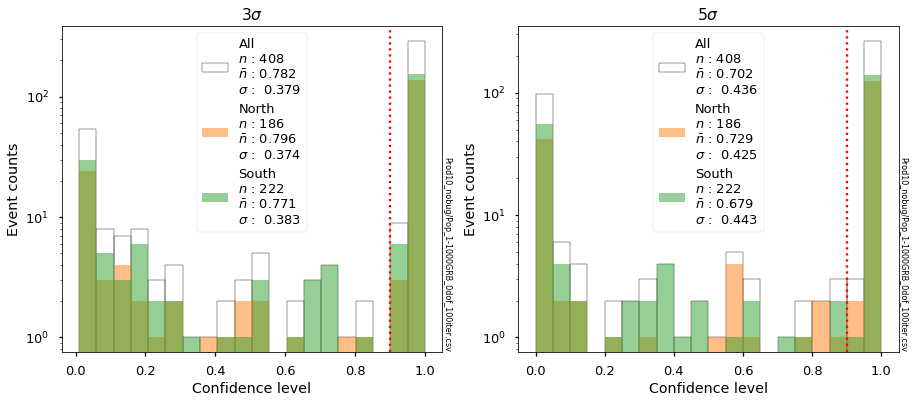

In [8]:
nbin=20
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

n, bins, _ = ax1.hist(g_ana.d3s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_ana.d3s, "All")) # Check
ax1.hist(g_ana[north].d3s, bins=bins, alpha=0.5, label=MyLabel(g_ana[north].d3s,label="North")) # Check
ax1.hist(g_ana[south].d3s, bins=bins, alpha=0.5, label=MyLabel(g_ana[south].d3s,label="South")) # Check
ax1.set_title("$3\sigma$")
ax1.set_yscale("log")
ax1.set_xlabel("Confidence level")
ax1.set_ylabel("Event counts")
ax1.axvline(x=0.9,color="red",ls=":")
stamp(ax1,file)
ax1.legend()

n,bins,_  = ax2.hist(g_ana.d5s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_ana.d5s,label="All"))
ax2.hist(g_ana[north].d5s,bins=bins, alpha=0.5, label=MyLabel(g_ana[north].d5s,label="North")) # Check
ax2.hist(g_ana[south].d5s,bins=bins, alpha=0.5, label=MyLabel(g_ana[south].d5s,label="South")) # Check
ax2.set_title("$5\sigma$")
ax2.set_yscale("log")
ax2.set_xlabel("Confidence level")
ax2.set_ylabel("Event counts")
ax2.axvline(x=0.9,color="red",ls=":")
stamp(ax2,file)
ax2.legend()
plt.show()


C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Boolean Series key will be re

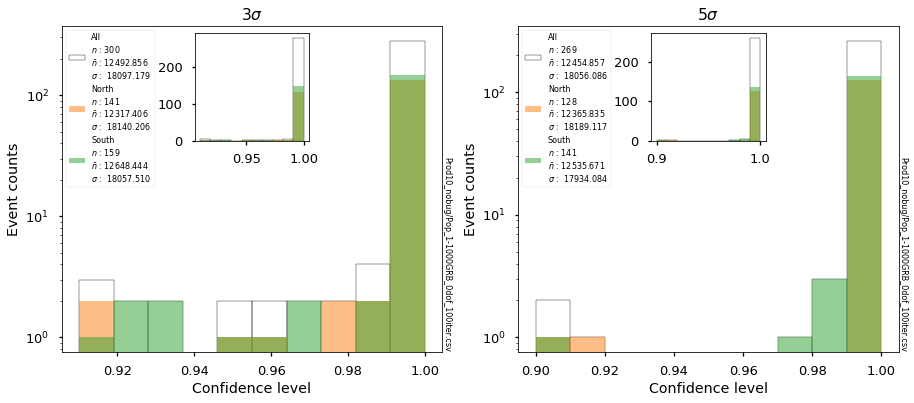

In [9]:
# Zoom on confidence levels
nbin=10
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

n, bins, _ = ax1.hist(g_3s.d3s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_3s.t3s, "All")) # Check
ax1.hist(g_3s[north].d3s, bins=bins, alpha=0.5, label=MyLabel(g_3s[north].t3s,label="North")) # Check
ax1.hist(g_3s[south].d3s, bins=bins, alpha=0.5, label=MyLabel(g_3s[south].t3s,label="South")) # Check
ax1.set_title("$3\sigma$")
ax1.set_yscale("log")
ax1.set_xlabel("Confidence level")
ax1.set_ylabel("Event counts")
stamp(ax1,file)
ax1.legend(fontsize=8)

ax11 = inset_axes(ax1,
                  width="30%", # width = 30% of parent_bbox
                  height=1.5, # height : 1 inch
                  loc="upper center")
n, bins, _ = ax11.hist(g_3s.d3s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_3s.t3s, "All")) # Check
ax11.hist(g_3s[north].d3s, bins=bins, alpha=0.5, label=MyLabel(g_3s[north].t3s,label="North")) # Check
ax11.hist(g_3s[south].d3s, bins=bins, alpha=0.5, label=MyLabel(g_3s[south].t3s,label="South")) # Check




n,bins,_  = ax2.hist(g_5s.d5s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_5s.t5s,label="All"))
ax2.hist(g_5s[north].d5s,bins=bins, alpha=0.5, label=MyLabel(g_5s[north].t5s,label="North")) # Check
ax2.hist(g_5s[south].d5s,bins=bins, alpha=0.5, label=MyLabel(g_5s[south].t5s,label="South")) # Check
ax2.set_title("$5\sigma$")
ax2.set_yscale("log")
ax2.set_xlabel("Confidence level")
ax2.set_ylabel("Event counts")
stamp(ax2,file)
ax2.legend(fontsize=8)

ax22 = inset_axes(ax2,
                  width="30%", # width = 30% of parent_bbox
                  height=1.5, # height : 1 inch
                  loc="upper center")
n, bins, _ = ax22.hist(g_5s.d5s,bins=nbin,facecolor="none",edgecolor="black",label=MyLabel(g_5s.t5s, "All")) # Check
ax22.hist(g_5s[north].d5s, bins=bins, alpha=0.5, label=MyLabel(g_5s[north].t5s,label="North")) # Check
ax22.hist(g_5s[south].d5s, bins=bins, alpha=0.5, label=MyLabel(g_5s[south].t5s,label="South")) # Check

plt.show()


In [10]:
# plt.hist(g_abrt.d3s,label=MyLabel(g_abrt.d3s))
# plt.legend()
print(len(g_abrt.d3s))
print(len(g_ana.d3s))
meanCL_abrt_3s = np.mean(g_ana.d3s[g_ana.d3s<0.9])
meanCL_abrt_5s = np.mean(g_ana.d5s[g_ana.d5s<0.9])

print("Assumes aborted events have the same CL as not aborted < 0.9 :",meanCL_abrt_3s,meanCL_abrt_5s)
print(" ==============================================")
print(" Mean number of events     : {:>8} {:>6}".format("3s","5s"))
print(" --------------------------+-------------------")
print("          No weighting, All : {:>5.0f}    {:>5.0f}".format( len(g_ana.d3s), len(g_ana.d5s) ) )
print("           CL-weighted, All : {:>8.2f} {:>8.2f}".format(sum(g_ana.d3s),sum(g_ana.d5s) ))
print("     CL-weighted, corrected : {:>8.2f} {:>8.2f}".format(sum(g_ana.d3s)+len(g_abrt)*meanCL_abrt_3s,
                                                               sum(g_ana.d5s)+len(g_abrt)*meanCL_abrt_5s))
print("     No weighting, > 90% CL : {:>5.0f}    {:>5.0f}".format( len(g_3s), len(g_5s) ))
print("         CL-weighted, > 90% : {:>8.2f} {:>8.2f}".format( sum(g_3s.d3s), sum(g_5s.d5s)))


1022
408
Assumes aborted events have the same CL as not aborted < 0.9 : 0.18481481481481482 0.12784172661870502
 Mean number of events     :       3s     5s
 --------------------------+-------------------
          No weighting, All :   408      408
           CL-weighted, All :   319.07   286.36
     CL-weighted, corrected :   507.95   417.01
     No weighting, > 90% CL :   300      269
         CL-weighted, > 90% :   299.11   268.59


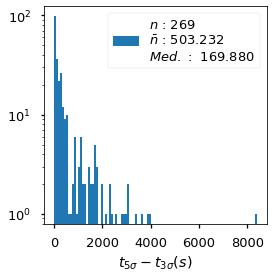

In [11]:
nbin=100
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
ax.hist(g_5s.t5s-g_5s.t3s,bins=nbin,label=MyLabel(g_5s.t5s-g_5s.t3s,stat="med"))
ax.set_xlabel("$t_{5\sigma} - t_{3\sigma} (s)$")
ax.legend()
ax.set_yscale("log")
plt.show()

# A closer look to statitics
Which GRB are seen on both sites and with which significance ?

Text(0.5, 1.0, 'Time to get $5 \\sigma$')

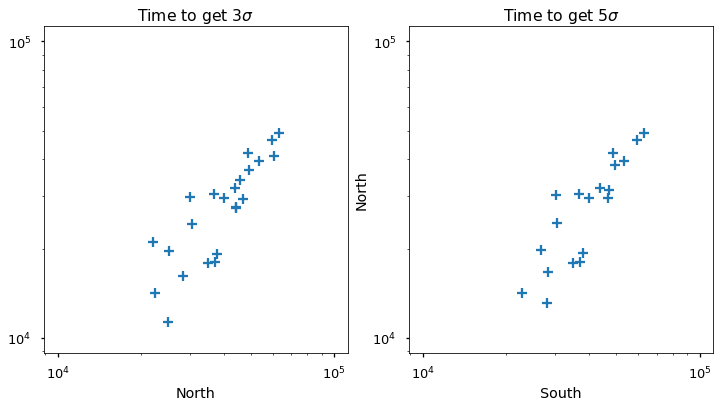

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax1.scatter(grb[grb.site=="South"].t3s,grb[grb.site=="North"].t3s,marker="+")

ax1.set_xlabel("South")
ax1.set_xlabel("North")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Time to get $3 \sigma$")

ax2.scatter(grb[grb.site=="South"].t5s,grb[grb.site=="North"].t5s,marker="+")
ax2.set_xlabel("South")
ax2.set_ylabel("North")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("Time to get $5 \sigma$")



In [ ]:
nbin=25
#fig, ((ax1, ax2),(ax11,ax22),(ax3,ax4)) = plt.subplots(nrows=3, ncols=2, figsize=(12,16))
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Long term detection
ax1.hist(g_3s.t3s/3600,bins=nbin,label=MyLabel(g_3s.t3s/3600))
ax1.set_xlabel("Delay from trigger (h)")
ax1.set_title("$3\sigma$")
ax1.set_yscale("log")
stamp(ax1,file)
ax1.legend(loc="center right")

ax11 = inset_axes(ax1,
                        width="40%", # width = 30% of parent_bbox
                        height=1., # height : 1 inch
                        loc="upper right")
ax11.hist(g_3s.t3s/3600,bins=nbin)

ax2.hist(g_5s.t5s/3600,bins=nbin,label=MyLabel(g_5s.t5s/3600))
ax2.set_xlabel("Delay from trigger (h)")
ax2.set_title("$5\sigma$")
ax2.set_yscale("log")
stamp(ax2,file)
ax2.legend(loc="center right")
ax22 = inset_axes(ax2,
                        width="40%", # width = 30% of parent_bbox
                        height=1., # height : 1 inch
                        loc="upper right")
ax22.hist(g_5s.t5s/3600,bins=nbin)
# # Long term detection - log-log
# ax11.hist(np.log10(g_3s.t3s),bins=25,label=MyLabel(np.log10(g_3s.t3s)))
# ax11.set_xlabel("Delay from trigger (log10(s))")
# #x11.set_title("$3\sigma$")
# ax11.set_yscale("log")
# ax11.legend()

# ax22.hist(np.log10(g_5s.t5s),bins=25,label=MyLabel(np.log10(g_5s.t5s)))
# ax22.set_xlabel("Delay from trigger (log10(s))")
# #x22.set_title("$5\sigma$")
# ax22.set_yscale("log")
# ax22.legend()

# Short term detection
ax3.hist(g_3s.t3s[g_3s.t3s<100],bins=nbin,label=MyLabel(g_3s.t3s[g_3s.t3s<100]))
ax3.set_xlim(xmin=0)
#ax3.set_title("$3\sigma$")
ax3.axvline(x=30,ls=":",color="grey",label="Slewing")
ax3.set_xlabel("Delay from trigger (s)")
ax3.legend()


ax4.hist(g_5s.t5s[g_5s.t5s<100],bins=nbin,label=MyLabel(g_5s.t5s[g_5s.t5s<100]))
ax4.set_xlim(xmin=0)
#ax4.set_title("$5\sigma$")
ax4.axvline(x=30,ls=":",color="grey",label="Slewing")
ax4.set_xlabel("Delay from trigger (s)")
ax4.legend()

#ax1.set_xscale("log")
plt.show()



In [ ]:
# hem_3s = pd.pivot_table(g_ana[i3s], index=['site'])
# hem_5s = pd.pivot_table(g_ana[i5s], index=['site'])
# #display(hem_3s.T)
# plt.hist(hem_3s.t3s)

In [ ]:
# Compute GRB that ware detected in both south and north

# Remove duplicate
grbnames = []
for i in range(0,len(grb)):
    grbnames.append(grb.GRB[i])
print("GRB : ",len(grbnames))
grbnames = list(set(grbnames))
print("GRB unique : ",len(grbnames))

# Check absent GRBs
nofound= 0
for i in range(1,1001):
    name = "Event"+str(i)
    #print(i,name)
    found = False
    for g in grbnames:
        if (g == name):
            #print(g," found")
            found = True
    if found==False:
        #print(name,"not found")
        nofound+=1

print("Number of absent GRB : ",nofound," -> found = ",1000-nofound)

In [ ]:
grb[grb.GRB=="Event533"].GRB

In [ ]:
# Now count for each present GRB if South and North detection information is available
ngrb_bothsite=0
i = 0 # trick to do the firsts
for name in grbnames:
    g = grb.GRB==name
    s = grb.Site=="South"
    n = grb.Site=="North"
    d3s_s = grb[g][s].t3s != -1
    d5s_s = grb[g][s].t5s != -1
    d3s_n = grb[g][n].t3s != -1
    d5s_n = grb[g][n].t5s != -1
    
    
    
    i+=1
    if (i>2):
        break
#         if (len(grb[g])==1):
#         print(name)
#         ngrb_bothsite +=1
        
        
print("Number of GRB with South/North entries       :",ngrb_bothsite)
# print("Number of GRB with none detected at 3 sigma  :",n_notdetected)

In [ ]:
g= (grb.GRB=="Event533")
grb.Site[g]

In [ ]:
################## Merge dataframes #######################################
# See: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# for merge options
# When event are in common, only events having both TC and WT information   
# kept, allowing for correlation plot to be obtained
# If not, only individual dsitribution can be plotted
# "inner" is default in Panda
#
# Merge method	SQL Join Name	  Description
# --------------------------------------------------------------
# left	        LEFT OUTER JOIN	  Use keys from left frame only
# right	        RIGHT OUTER JOIN  Use keys from right frame only
# outer	        FULL OUTER JOIN	  Use union of keys from both frames
# inner	        INNER JOIN	      Use intersection of keys from both frames

In [ ]:
#     if (common):
#         tc_wt = pd.merge(tc, wt,  on="Id", how="inner", suffixes=('_tc', '_wt'))
#         df = pd.merge(tc_wt, ref, on="Id", how="inner" )
#     else:    
#         tc_wt = pd.merge(tc, wt,  on="Id", how="outer", suffixes=('_tc', '_wt'))  #.dropna(how='any')
#         df = pd.merge(tc_wt, ref, on="Id", how="outer")
# tc_wt = pd.merge(tc, wt, on="Id", suffixes=('_tc', '_wt'))  #.dropna(how='any')
# df = pd.merge(tc_wt, ref, on="Id")
grb2 = grb.merge(grb[n],grb[s],on="GRB",suffixes=('_n','_s'))


### Analyze data

In [ ]:
# Show z bias in detection
bins = 25
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(5*ncols,5*nrows))

a=ax[0][0]

a.hist(z,alpha=0.5,bins=bins)
a.hist(z[idt3s],bins=bins,alpha=0.5,label=MyLabel(z[idt3s],"3 $\sigma$"))
a.hist(z[idt5s],bins=bins,label=MyLabel(z[idt5s],"5 $\sigma$"))
a.hist(z[not idt3s],bins=bins,label=MyLabel(z[idt5s],"Not detected"))
a.set_title("Redshift")
a.legend()


a=ax[0][1]
a.hist(sigmax,bins=bins)
a.set_title("Max signif.")

a=ax[1][0]
a.hist2d(z,sigmax,alpha=0.5,bins=bins)
a.set_xlabel("z")
a.set_ylabel("$\sigma_{max}$")
plt.show()